<a href="https://colab.research.google.com/github/celiaferreira/Covid19_RX/blob/master/3_AnaliseDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 3. Análises exploratórias de dados

Nesta secção analisam-se as **imagens de raio-X de input**, as **labels** a prever e os pacientes **COVID-19**.

In [ ]:
# Packages
from tqdm import tqdm #barra de progreso`
import cv2
import numpy as np
import pandas as pd
import skimage
from skimage.transform import resize
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 3.1 Visualização de inputs
Nesta secção visualizamos imagens de casos **normais**, casos **covid**, pneumonia **viral** e pneumonia **bacteriana**.

Reshape das imagens (200x200):

In [ ]:
print('X_all:',X_all.shape)

X_all: (8863, 200, 200, 1)


Normal:


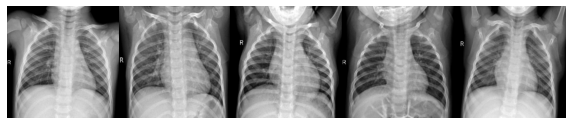

COVID-19:


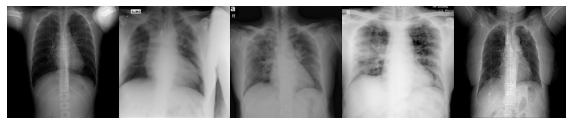

Pneumonia viral:


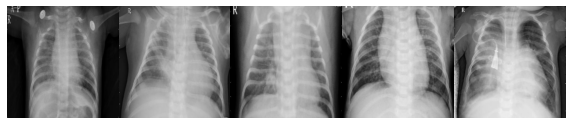

Pneumonia bacteriana:


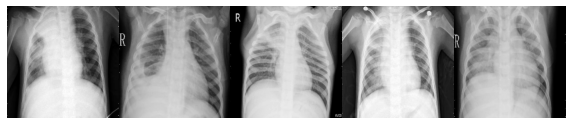

In [ ]:
############################ NORMAL
index2=[]
for i in range(0,len(y_all),1):
  if y_all[i] ==3:
    index2.append(i)

plt.subplots_adjust(wspace=0, hspace=0)
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
print('Normal:')
for l in index2[:5]:
    #print(i_)    
    plt.subplot(1,5, i_+1) #.set_title(l)
    i_ += 1
    im = X_all[l]
    im = im[:,:,0]
    plt.imshow(im, cmap="gray")
    plt.axis('off')
plt.show()
############################ COVID 19
index2=[]
for i in range(0,len(y_all),1):
  if y_all[i] ==0:
    index2.append(i)

plt.subplots_adjust(wspace=0, hspace=0)
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
print('COVID-19:')
for l in index2[:5]:
    #print(i_)    
    plt.subplot(1, 5, i_+1) #.set_title(l)
    i_ += 1
    im = X_all[l]
    im = im[:,:,0]
    plt.imshow(im, cmap="gray")
    plt.axis('off')
plt.show()
############################ VIRAL
index2=[]
for i in range(0,len(y_all),1):
  if y_all[i] ==1:
    index2.append(i)

plt.subplots_adjust(wspace=0, hspace=0)
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
print('Pneumonia viral:')
for l in index2[:5]:
    #print(i_)    
    plt.subplot(1, 5, i_+1) #.set_title(l)
    i_ += 1
    im = X_all[l]
    im = im[:,:,0]
    plt.imshow(im, cmap="gray")
    plt.axis('off')
plt.show()
############################ BACTERIANA
index2=[]
for i in range(0,len(y_all),1):
  if y_all[i] ==2:
    index2.append(i)

plt.subplots_adjust(wspace=0, hspace=0)
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
print('Pneumonia bacteriana:')
for l in index2[:5]:
    #print(i_)    
    plt.subplot(1, 5, i_+1) #.set_title(l)
    i_ += 1
    im = X_all[l]
    im = im[:,:,0]
    plt.imshow(im, cmap="gray")
    plt.axis('off')
plt.show()

A imagem abaixo apresenta uma imagem e o histograma que representa a intensidade dos pixeis observados.

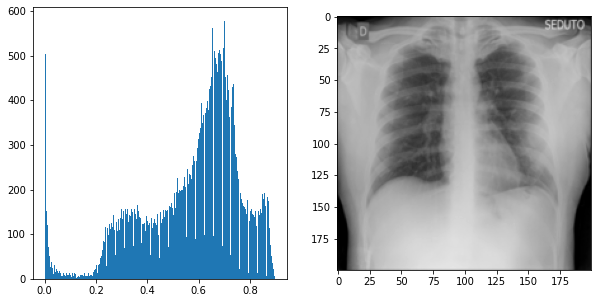

<Figure size 360x288 with 0 Axes>

Paciente: 0


In [ ]:
X_all200 = X_all.reshape(len(y_all),200,200)

def plotHistogram(a):
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.hist(a.ravel(), bins=255)
    plt.subplot(1, 2, 2)
    plt.imshow(a, cmap='gray', vmin=0, vmax=1)
    plt.figure(figsize=(5,4))
    plt.show()
plotHistogram(X_all200[6200])
print('Paciente:',y_all[6200])

O gráfico anterior comprova que as imagens já estão standardizadas, com pixeis variando entre 0 (preto) e 1 (branco). Constata-se uma maior concentração em cores claras na imagem, refletida do histograma.

#### 3.2 Visualização das labels

Nos dados reais importados existem 4 labels com a seguinte incidência:

In [ ]:
def count_labels(y_all):
    how_many_0 = len(np.where(y_all==0)[0])
    how_many_1 = len(np.where(y_all==1)[0])
    how_many_2 = len(np.where(y_all==2)[0])
    how_many_3 = len(np.where(y_all==3)[0])

    print('#covid:',how_many_0)
    print('#viral:',how_many_1)
    print('#bacteria:',how_many_2)
    print('#normal:',how_many_3)
    return how_many_0,how_many_1,how_many_2,how_many_3

#covid: 952
#viral: 2084
#bacteria: 974
#normal: 2819


Text(0.5, 1.0, '(952, 2084, 974, 2819)')

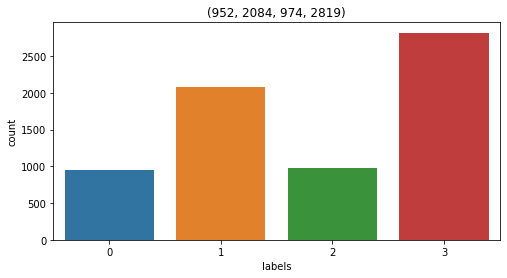

In [ ]:
plt.figure(figsize=(8,4))
map_characters = {0: 'COVID-19', 1: 'Viral Pneumonia', 2: 'Bacteriana', 3: 'Normal'}
dict_characters=map_characters
df = pd.DataFrame()
df["labels"]=y_all
lab = df['labels']
dist = lab.value_counts()
sns.countplot(lab).set_title(count_labels(y_all))

Visualização percentual:

#covid: 952
#viral: 2084
#bacteria: 974
#normal: 2819


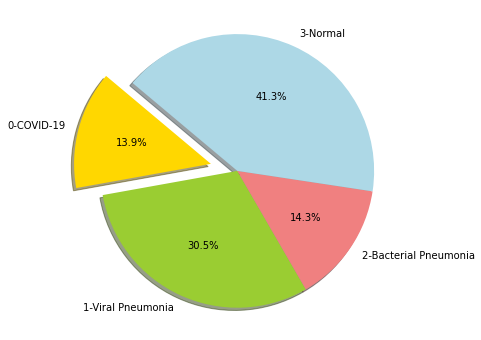

In [ ]:
plt.figure(figsize=(6,6))

labels = '0-COVID-19', '1-Viral Pneumonia', '2-Bacterial Pneumonia', '3-Normal'
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightblue']
explode = (0.2, 0, 0, 0)  # explode 1st slice
sizes = count_labels(y_all)
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

Nesta data, estão disponíveis: 
- 952 COVID-19, 
- 2084 peumonia viral, 
- 974 penumonia bacteriana e 
- 2819 situações normais.

O dataset não está balanceado. Antecipa-se que possa ser vantajoso:
* aumentar os registos de COVID-19, via **data generation** ou **oversampling**
* agregar as classes de pneumonia viral e bacteriana numa classe 'outras pneumonias', dado a pneumonia bacteriana estar pouco representada e não ser âmbito do projeto distinguir pnumonia viral de bacteriana.

### 3.3. Análise de pacientes COVID-19
Esta secção incorpora caracterização de indivíduos infetados com COVID-19.

In [ ]:
url ='https://raw.githubusercontent.com/ieee8023/covid-chestxray-dataset/master/metadata.csv'

covid = pd.read_csv(url, error_bad_lines=False)

In [ ]:
covid['finding'].value_counts()

COVID-19          420
todo               23
No Finding         17
Streptococcus      17
SARS               16
Pneumocystis       15
COVID-19, ARDS     12
Klebsiella          8
Pneumonia           8
Varicella           5
ARDS                4
Legionella          4
Bacterial           4
E.Coli              4
Chlamydophila       2
Influenza           2
Name: finding, dtype: int64

In [ ]:
covid.head()

,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes
0,2,0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
1,2,3,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
2,2,5,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
3,2,6,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
4,4,0,F,52.0,COVID-19,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN


In [ ]:
import pandas as pd
covid['temperature'] = pd.to_numeric(covid['temperature'], errors='coerce')
covid['pO2_saturation'] = pd.to_numeric(covid['pO2_saturation'], errors='coerce')
covid['leukocyte_count'] = pd.to_numeric(covid['leukocyte_count'], errors='coerce')
covid['neutrophil_count'] = pd.to_numeric(covid['neutrophil_count'], errors='coerce')
covid['lymphocyte_count'] = pd.to_numeric(covid['lymphocyte_count'], errors='coerce')


As variáveis disponíveis passam por:
* idade
* género
* sobrevovência
* ventilação/UCI
* temperatura
* saturação de oxigénio
* contagem de leucócitos
* contagem de neutrófilos
* contagem de linfócitos

Para as variáveis contínuas temos as seguintes distribuições:

In [ ]:
covid.iloc[:,2:].describe()

,age,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count
count,415.000000,41.000000,97.000000,12.000000,26.000000,34.000000
mean,54.200000,39.643902,72.786598,5.214167,4.787692,5.028235
std,15.919665,8.897276,39.839976,2.937799,3.207725,22.267453
min,12.000000,36.400000,20.000000,0.220000,0.000000,0.400000
25%,43.000000,37.800000,45.000000,3.067500,2.725000,0.800000
50%,55.000000,38.200000,80.000000,5.935000,3.950000,1.100000
75%,67.000000,39.000000,93.000000,6.857500,6.112500,1.550000
max,88.000000,95.000000,340.000000,11.200000,12.900000,131.000000


Constata-se que a idade é o único campo que aparece frequentemente preenchido. As restantes variáveis apresentam muitos MV. Verificam-se:
* idades entre os 12 e os 88 anos (mediana 55 anos)
* temperaturas entre os 36,4ºC e os 95ºC (deve tratar-se de um *typo*)
* percentagens de saturação de O2 no sangue entre os 20% e os 340% (*typo*), sendo que 50% dos indivíduos apresenta valores de 80% de saturação.

Os gráficos abaixo mostram que, para a amostra de pacientes em análise, o COVID afeta mais homens do que mulheres e a maior parte dos indivíduos sobrevive.

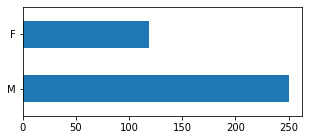

In [ ]:
covid['sex'].value_counts().head(30).plot(kind='barh', figsize=(5,2))

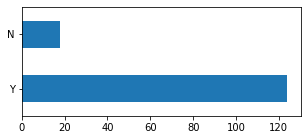

In [ ]:
covid['survival'].value_counts().head(30).plot(kind='barh', figsize=(5,2))

O gráfico abaixo mostra que a doença afeta <u>todas as ranges de idade</u>.

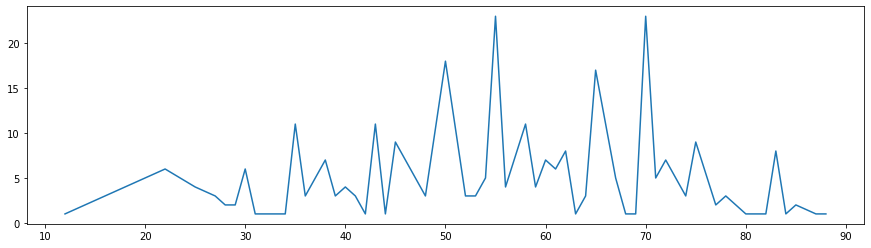

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(covid['age'].value_counts().sort_index())

O correlograma abaixo analisa relações entre as variáveis disponibilizadas:

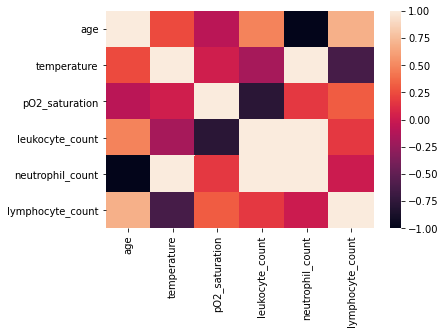

In [ ]:
corr = covid.iloc[:,2:].corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)

Correlação **negativa** entre:

    - idade e neutrófilos
    - temperatura e linfócitos
    - saturação oxigénio e leucócitos
    
Correlação positiva entre:

    - temperatura e neutrófilos
    - leucócitos e neutrófilos

O gráfico abaixo mostra uma maior densidade de pacientes entre os 50-80 anos e temperatura a rondar os 38ºC.
No entanto, as temperaturas mais elevadas (40ºC) são experienciadas por indivíduos mais jovens (30-50 anos). Recordamos, no entanto, que o registo da temperatura apresenta muitos MV.

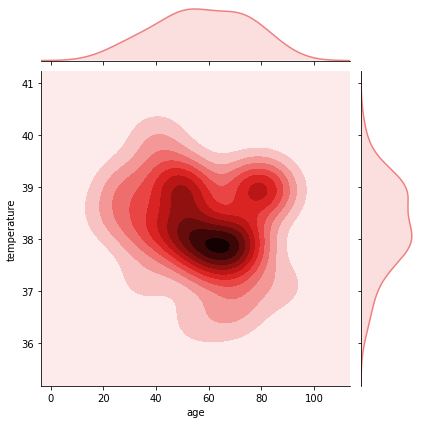

In [ ]:
sns.jointplot(x = "age",y = "temperature",data=covid[covid.temperature<=50],kind = "kde",color="lightcoral") # contour plot

Os boxplots abaixo relacionam a **sobrevivência** com o **género** e a idade:
* 50% dos homens (M) que falecem têm idade inferior a 50 anos
* mulheres (F) apresentam uma maior range de idade afetada
* mulheres que falecem apresentam maioritariamente idade avançada (>70 anos)


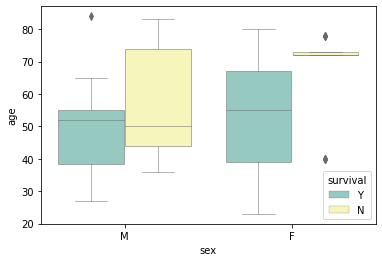

In [ ]:
ax = sns.boxplot(y="age", x="sex",hue="survival",data=covid[covid.survival!='?'], palette="Set3",linewidth=0.5)

Outra representação que corrobora as conclusões acima
* (cada ponto representa um indivíduo):

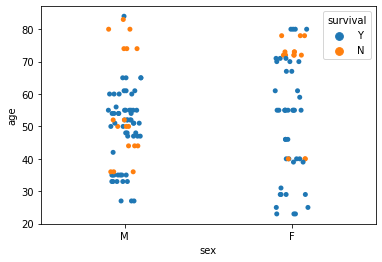

In [ ]:
sns.stripplot(x='sex', y='age', data=covid[covid.survival!='?'], jitter=True, hue='survival')

O gráfico abaixo evidencia uma necessidade de ventilação:
* ao longo de todas as idades para os homens (M)
* essencialmente acima dos 60 anos para as mulheres (F)

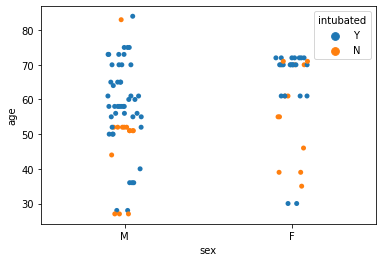

In [ ]:
sns.stripplot(x='sex', y='age', data=covid[covid.intubated!='?'], jitter=True, hue='intubated')